In [1]:
# Importo librerias

import pandas as pd
import numpy as np
import src.funciones as fn    # --> Archivo de funciones
import matplotlib.pyplot as plt
import seaborn as sns
from math import sin, cos, sqrt, atan2,radians
from collections import Counter

In [2]:
airbnb=pd.read_csv("output/Airbnb_Madrid.csv")
airbnb.head()

,Unnamed: 0,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,listing_url,description,accommodates,amenities
0,0,6369,"Rooftop terrace room with ensuite bathroom, Airc.",Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,https://www.airbnb.com/rooms/6369,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,2,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat..."
1,1,21853,Bright and airy room,Latina,Cármenes,40.40341,-3.74084,Private room,17,4,https://www.airbnb.com/rooms/21853,We have a quiet and sunny room with a good vie...,1,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""..."
2,2,24805,Gran Via Studio Madrid,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,5,https://www.airbnb.com/rooms/24805,"Studio located 50 meters from Gran Via, next t...",3,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E..."
3,3,24836,"Select the Madrid more ""cool"".",Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,https://www.airbnb.com/rooms/24836,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...",4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning..."
4,4,26825,Single Room whith private Bathroom,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,2,https://www.airbnb.com/rooms/26825,Nice and cozy roon for one person with a priva...,1,"{Wifi,""Wheelchair accessible"",Doorman,Elevator..."


In [3]:
airbnb=airbnb.drop(columns=['Unnamed: 0'])

### Neighbourhood Analysis

In [4]:
# Existen 21 agrupaciones de vecindarios en Madrid
print(airbnb.neighbourhood_group.unique())

['Chamartín' 'Latina' 'Centro' 'Arganzuela' 'Salamanca' 'Tetuán'
 'Fuencarral - El Pardo' 'Ciudad Lineal' 'Chamberí' 'Villaverde'
 'Hortaleza' 'Moncloa - Aravaca' 'Carabanchel' 'Retiro'
 'San Blas - Canillejas' 'Villa de Vallecas' 'Barajas' 'Usera'
 'Puente de Vallecas' 'Moratalaz' 'Vicálvaro']


In [5]:
# Estos son los diferentes vecindarios únicos en las 21 agrupaciones.
print(airbnb.neighbourhood.unique())

['Hispanoamérica' 'Cármenes' 'Universidad' 'Justicia' 'Legazpi' 'Sol'
 'Embajadores' 'Palacio' 'Cortes' 'Recoletos' 'Cuatro Caminos' 'Valverde'
 'Pueblo Nuevo' 'Trafalgar' 'Almagro' 'Pilar' 'Rios Rosas' 'Los Angeles'
 'Pinar del Rey' 'Arapiles' 'Piovera' 'Castellana' 'Argüelles'
 'Puerta Bonita' 'Canillas' 'San Isidro' 'Aluche' 'Valdefuentes'
 'Berruguete' 'Puerta del Angel' 'Delicias' 'Pacífico' 'Ciudad Jardín'
 'Palos de Moguer' 'Almenara' 'Guindalera' 'Niño Jesús' 'Acacias'
 'Fuente del Berro' 'Estrella' 'Goya' 'Bellas Vistas' 'Casa de Campo'
 'Comillas' 'Rosas' 'Palomas' 'Jerónimos' 'Concepción' 'Arcos' 'Hellín'
 'Costillares' 'Gaztambide' 'Ibiza' 'Casco Histórico de Vallecas'
 'Casco Histórico de Barajas' 'San Fermín' 'Lucero' 'Aravaca'
 'Palomeras Bajas' 'Prosperidad' 'Santa Eugenia' 'Castilla' 'Lista'
 'Numancia' 'Adelfas' 'Vallehermoso' 'El Viso' 'Alameda de Osuna'
 'Media Legua' 'Entrevías' 'San Juan Bautista' 'San Diego' 'Castillejos'
 'Valdeacederas' 'Simancas' 'Timón' 'Salv

###### 
El siguiente gráfico representa el recuento de Airbnb en los diferentes grupos de vecindarios. Desde la gráfica, podemos visualizar fácilmente que el número máximo de casas o apartamentos que figuran en Airbnb está en el centro

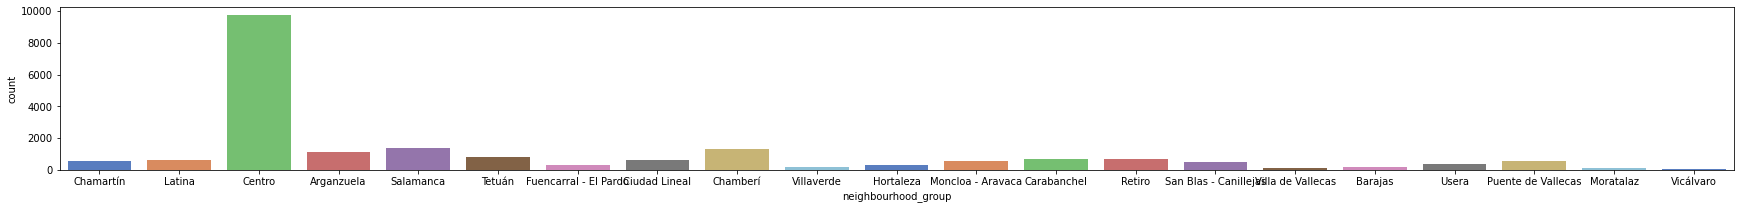

In [6]:
f,ax = plt.subplots(figsize=(30,3))
ax = sns.countplot(airbnb.neighbourhood_group,palette="muted")
plt.show()

### Price Analysis

In [7]:
# Anáisis estadístico del precio
print(airbnb['price'].describe())

count    20837.000000
mean       134.065364
std        381.207575
min          8.000000
25%         40.000000
50%         65.000000
75%        100.000000
max       9999.000000
Name: price, dtype: float64


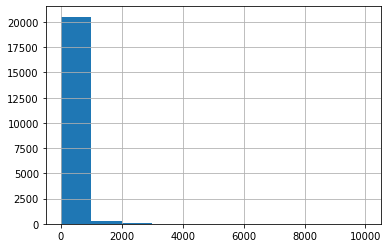

In [8]:
# Visualizamos la distribución del precio. Se observa que la mayoría de los listados tienen un precio menor a 1000€
hist_price=airbnb["price"].hist()

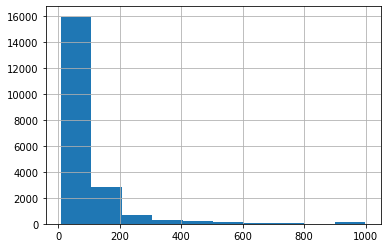

In [9]:
# Se traza el histograma de nuevo para precios menores de 1000€
hist_price1=airbnb["price"][airbnb["price"]<1000].hist()

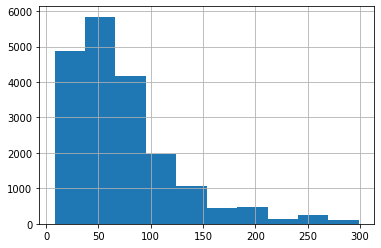

In [10]:
# Se observa que la mayoría de los Airbnb tienen un precio entre 10-80€ la noche
hist_price2=airbnb["price"][airbnb["price"]<300].hist()

In [11]:
print(airbnb.shape)
print(airbnb[airbnb["price"]>300].shape)

(20837, 13)
(1355, 13)


In [12]:
# Nuevo dataset con los datos que tienen un precio máximo de 300€
airbnb2=airbnb[airbnb["price"]<300]

In [13]:
airbnb2['neighbourhood'].value_counts()

Embajadores      2566
Universidad      1905
Palacio          1449
Sol              1298
Justicia         1126
                 ... 
Pavones             5
El Plantío          4
Fuentelareina       3
Atalaya             3
El Pardo            3
Name: neighbourhood, Length: 127, dtype: int64

In [14]:
# Cuántos vecindarios aparecen más de 800 veces?
airbnb_nh=airbnb2.groupby("neighbourhood").filter(lambda x: x['neighbourhood'].count() > 800)
print(airbnb_nh.neighbourhood.unique())

['Universidad' 'Justicia' 'Sol' 'Embajadores' 'Palacio' 'Cortes']


In [15]:
# Veamos el precio promedio por vecindario
# El Barrio de Salamanca es la zona más cara y Villaverde es más barata 

ng_price=airbnb2.groupby("neighbourhood_group")["price"].mean()
print(ng_price)

neighbourhood_group
Arganzuela               60.201112
Barajas                  56.006944
Carabanchel              54.169255
Centro                   81.283653
Chamartín                79.134653
Chamberí                 72.379675
Ciudad Lineal            53.361511
Fuencarral - El Pardo    55.256705
Hortaleza                68.667832
Latina                   46.486726
Moncloa - Aravaca        71.011976
Moratalaz                50.739130
Puente de Vallecas       42.539007
Retiro                   76.851501
Salamanca                88.203837
San Blas - Canillejas    73.803125
Tetuán                   64.536000
Usera                    41.810289
Vicálvaro                65.574074
Villa de Vallecas        55.586957
Villaverde               39.227848
Name: price, dtype: float64


Entire home/apt    11741
Private room        6913
Hotel room           393
Shared room          258
Name: room_type, dtype: int64


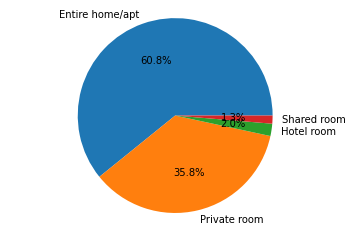

In [16]:
# Analizamos la variable room_type. 
# La mayoría de los anuncios (60.8%) son Entire home seguidos de Private room (35.8%)
print(airbnb2['room_type'].value_counts())

ngp = airbnb2['room_type'].value_counts().reset_index()
ngp.columns = ['room_type', 'Count']
ngp['Percent'] = ngp['Count']/ngp['Count'].sum() * 100

fig1, ax1 = plt.subplots()
ax1.pie(list(ngp['Percent']), labels=list(ngp['room_type']), autopct='%1.1f%%')
ax1.axis('equal')

plt.show()

In [17]:
# Precio medio por tipo de habitación.
# Los apartamentos tienen el precio más alto y las habitaciones compartidas el más bajo.
avg_price = airbnb2.groupby("room_type")["price"].mean()
print(avg_price)

room_type
Entire home/apt    90.764330
Hotel room         84.180662
Private room       42.990308
Shared room        38.844961
Name: price, dtype: float64


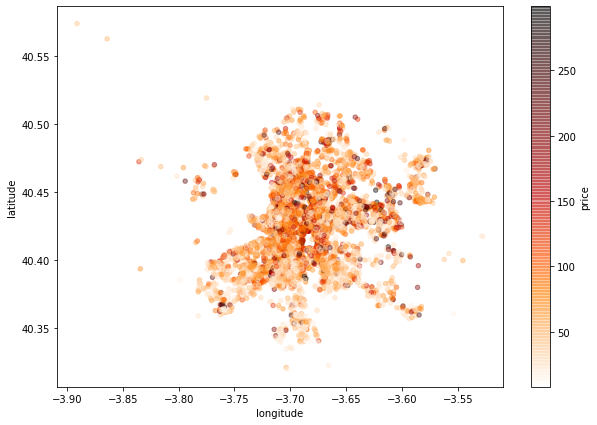

In [18]:
# Diferencias de precios en mapa
airbnb2.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7), 
        c="price", cmap="gist_heat_r", colorbar=True, sharex=False);

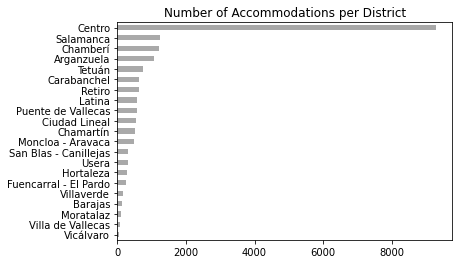

In [19]:
# Numero de alojamientos por vecindario
airbnb2['neighbourhood_group'].value_counts().sort_values().plot(kind='barh', color='darkgrey')
plt.title('Number of Accommodations per District');

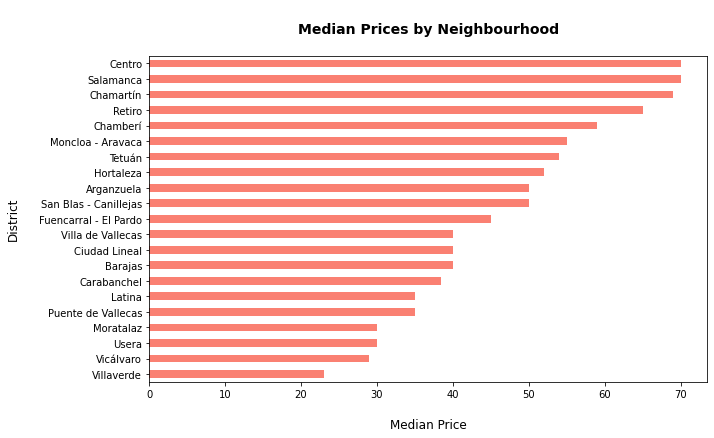

In [20]:
# Agrupo por neighbourhood groups, cojo el precio medio y guardo los valores en un nuevo df 
abnb_grouped = pd.DataFrame(airbnb2.groupby(['neighbourhood_group'])['price'].agg(np.median))
abnb_grouped.reset_index(inplace=True)

# Visualizo
abnb_grouped.sort_values(by=['price'], ascending=True)\
          .plot(kind='barh', x='neighbourhood_group', y='price', 
                figsize=(10,6), legend=False, color='salmon')

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nMedian Prices by Neighbourhood\n', fontsize=14, fontweight='bold');

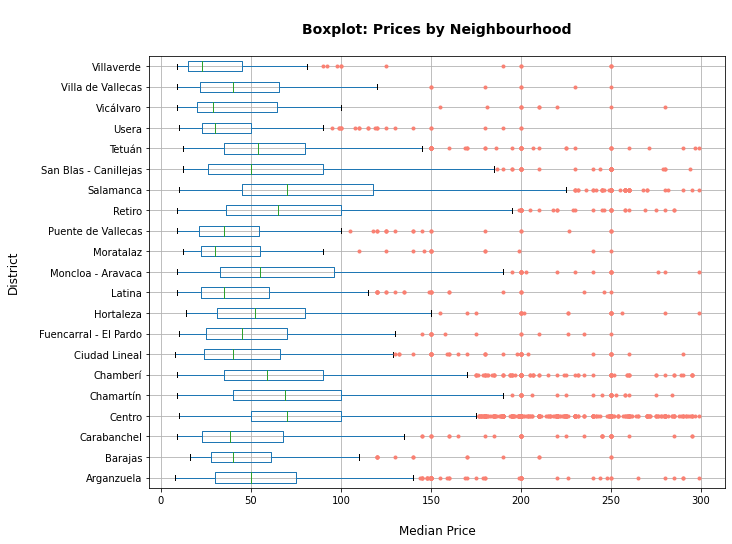

In [21]:
red_square = dict(markerfacecolor='salmon', markeredgecolor='salmon', marker='.')

airbnb2.boxplot(column='price', by='neighbourhood_group', flierprops=red_square, vert=False, figsize=(10,8))

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nBoxplot: Prices by Neighbourhood\n', fontsize=14, fontweight='bold')

# Elimino el título automático
plt.suptitle('');

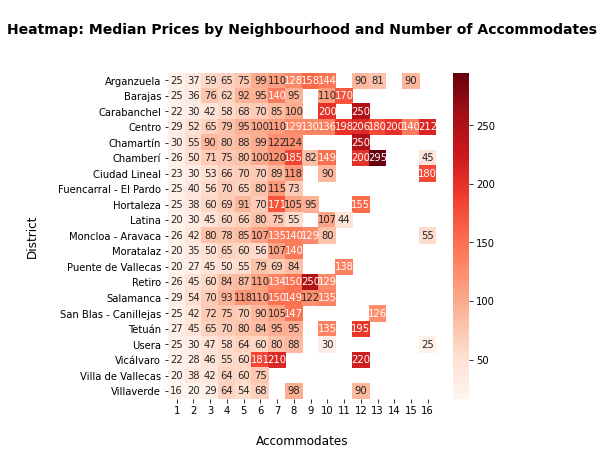

In [22]:
# Precios por número de personas
plt.figure(figsize=(6,6))
sns.heatmap(airbnb2.groupby(['neighbourhood_group', 'accommodates']).price.median().unstack(), 
            cmap='Reds', annot=True, fmt=".0f")

plt.xlabel('\nAccommodates', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nHeatmap: Median Prices by Neighbourhood and Number of Accommodates\n\n', fontsize=14, fontweight='bold');

### Minimum nights Analysis

In [23]:
## Aalizamos el mínimo número de noches
airbnb2["minimum_nights"].describe()

count    19305.000000
mean         4.471277
std         20.074798
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max       1125.000000
Name: minimum_nights, dtype: float64

<AxesSubplot:>

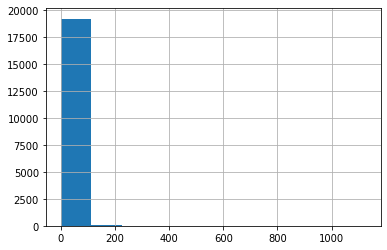

In [24]:
# La mayoría de los valores están por debajo de 100
hist_mn=airbnb2["minimum_nights"].hist()
hist_mn

<AxesSubplot:>

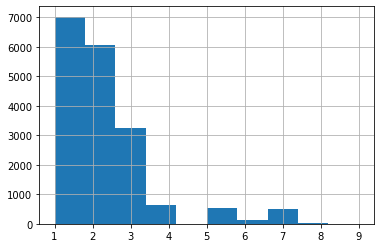

In [25]:
# Miramos en detalle
hist_mn1=airbnb2["minimum_nights"][airbnb2["minimum_nights"]<10].hist()
hist_mn1

In [26]:
airbnb2["minimum_nights"][airbnb2["minimum_nights"]>30]

46        90
75       365
160       55
214      120
232      180
        ... 
20437     90
20647    180
20734     90
20735     90
20740     90
Name: minimum_nights, Length: 216, dtype: int64

In [27]:
# Reemplazo todos los valores mayores que 30 por 30
airbnb2.loc[(airbnb2.minimum_nights >30),"minimum_nights"]=30

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [28]:
# El mínimo de noches tiene impacto dobre el precio?
airbnb2["minimum_nights"].corr(airbnb2["price"])

0.005221741405261785

Index(['id', 'name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights', 'listing_url',
       'description', 'accommodates', 'amenities'],
      dtype='object')

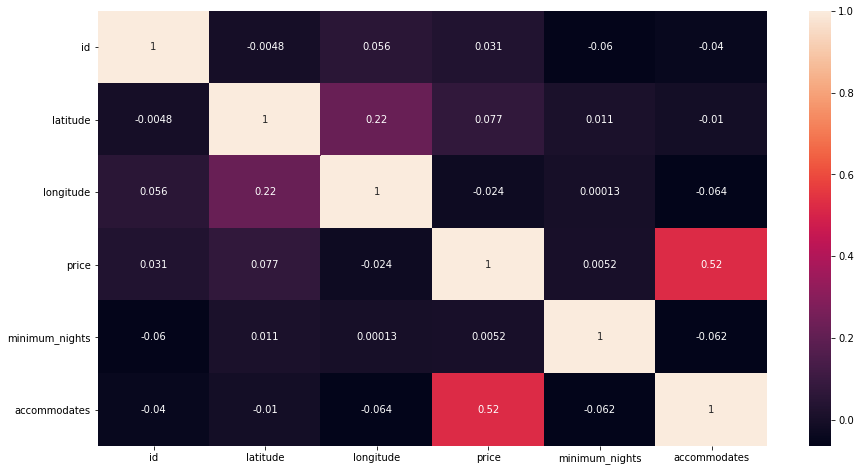

In [29]:
# Visualizamos la matriz de correlación
corr = airbnb2.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
airbnb2.columns

### Amentities Analysis

### 
Me interesan las comodidades que ofrecen los anfitriones a sus huéspedes y, por lo que voy a determinar qué comodidades podrían ser que hagan que una propiedad sea más deseable.

In [30]:
# Incluyo una columna por el nº de amentities
airbnb2['No_of_amentities'] = airbnb2['amenities'].apply(lambda x:len(x.split(',')))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
# La función Counter() dentro de la biblioteca collections es un contenedor que registra cuántas veces se agregan valores equivalentes

results = Counter()
airbnb2['amenities'].str.strip('{}')\
                   .str.replace('"', '')\
                   .str.lstrip('\"')\
                   .str.rstrip('\"')\
                   .str.split(',')\
                   .apply(results.update)

results.most_common(30)

[('Wifi', 18455),
 ('Essentials', 18088),
 ('Kitchen', 17635),
 ('Heating', 17129),
 ('Washer', 16199),
 ('Hangers', 15952),
 ('TV', 15410),
 ('Hair dryer', 14152),
 ('Iron', 14094),
 ('Shampoo', 13732),
 ('Hot water', 12147),
 ('Laptop friendly workspace', 12143),
 ('Air conditioning', 11979),
 ('Elevator', 11154),
 ('Refrigerator', 8709),
 ('Dishes and silverware', 8501),
 ('Microwave', 8196),
 ('Bed linens', 7539),
 ('Coffee maker', 7536),
 ('Cooking basics', 7356),
 ('Host greets you', 7002),
 ('No stairs or steps to enter', 6986),
 ('Family/kid friendly', 6341),
 ('Stove', 5808),
 ('Long term stays allowed', 5723),
 ('Oven', 5620),
 ('First aid kit', 5082),
 ('Extra pillows and blankets', 4802),
 ('Paid parking off premises', 4421),
 ('Fire extinguisher', 4256)]

In [32]:
# Creo un nuevo dataframe para las amentities
airbnb_amenity = pd.DataFrame(results.most_common(30), columns=['amenity', 'count'])

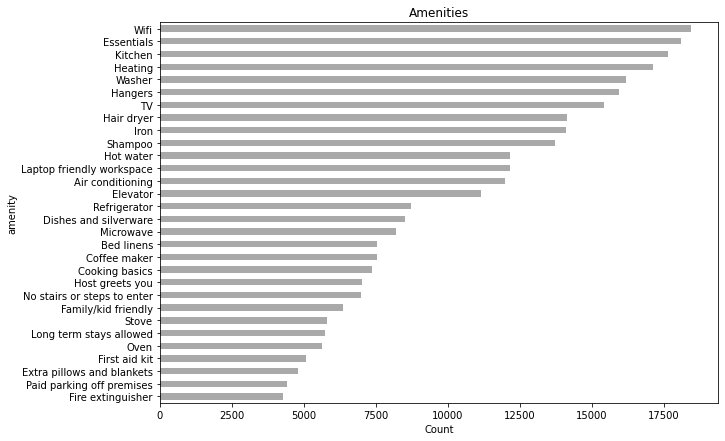

In [33]:
# Visualizamos 
airbnb_amenity.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenity', y='count',  
                                                      figsize=(10,7), legend=False, color='darkgrey',
                                                      title='Amenities')
plt.xlabel('Count');

### Distancias

In [34]:
'''
airbnb2['distance_central'] = airbnb2.apply(fn.dist_centro,axis=1)
airbnb2['distance_airport'] = airbnb2.apply(fn.dist_aero,axis=1)
airbnb2['distance_atocha'] = airbnb2.apply(fn.dist_atocha,axis=1)
airbnb2['distance_avg'] = ( airbnb2['distance_central'] + airbnb2['distance_airport'] + airbnb2['distance_atocha'] )/3.0
airbnb2.head()'''

"\nairbnb2['distance_central'] = airbnb2.apply(fn.dist_centro,axis=1)\nairbnb2['distance_airport'] = airbnb2.apply(fn.dist_aero,axis=1)\nairbnb2['distance_atocha'] = airbnb2.apply(fn.dist_atocha,axis=1)\nairbnb2['distance_avg'] = ( airbnb2['distance_central'] + airbnb2['distance_airport'] + airbnb2['distance_atocha'] )/3.0\nairbnb2.head()"

In [35]:
airbnb2['distance_central'] = airbnb2.apply(fn.dist,lonM=40.41673, latM=-3.70334,axis=1)
airbnb2['distance_airport'] = airbnb2.apply(fn.dist,lonM=40.49181, latM=-3.56948,axis=1)
airbnb2['distance_train'] = airbnb2.apply(fn.dist,lonM=40.40848, latM=-3.69615,axis=1)
airbnb2.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,listing_url,description,accommodates,amenities,No_of_amentities,distance_central,distance_airport,distance_train
0,6369,"Rooftop terrace room with ensuite bathroom, Airc.",Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,https://www.airbnb.com/rooms/6369,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,2,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",16,4.91,9.97,5.54
1,21853,Bright and airy room,Latina,Cármenes,40.40341,-3.74084,Private room,17,4,https://www.airbnb.com/rooms/21853,We have a quiet and sunny room with a good vie...,1,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",31,3.50,17.52,3.83
2,24805,Gran Via Studio Madrid,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,5,https://www.airbnb.com/rooms/24805,"Studio located 50 meters from Gran Via, next t...",3,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",32,0.59,13.78,1.64
3,24836,"Select the Madrid more ""cool"".",Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,https://www.airbnb.com/rooms/24836,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...",4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",18,0.60,13.47,1.28
4,26825,Single Room whith private Bathroom,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,2,https://www.airbnb.com/rooms/26825,Nice and cozy roon for one person with a priva...,1,"{Wifi,""Wheelchair accessible"",Doorman,Elevator...",16,3.19,15.26,2.13


In [36]:
airbnb2.to_csv("output/Airbnb2_Madrid.csv")